#Import libraries and load Dataset

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
!pip install featurewiz
import featurewiz
np.random.seed(1234)

In [ ]:
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/ML/Machine Learning Project. GALINDO - PAGLIA/kick.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(72983, 33)

Variables description:
1.   IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase
2.   PurchDate: The Date the vehicle was Purchased at Auction
3.   Auction: Auction provider at which the  vehicle was purchased
4.   VehYear: The manufacturer's year of the vehicle
5.   VehicleAge: The Years elapsed since the manufacturer's year
6.   Make: Vehicle Manufacturer
7.   Model: Vehicle Model
8.   Trim: Vehicle Trim Level
9.   SubModel: Vehicle Submodel
10.  Color: Vehicle Color
11.  Transmission: Vehicles transmission type (Automatic, Manual)
12.  WheelTypeID: The type id of the vehicle wheel
13.  WheelType: The vehicle wheel type description (Alloy, Covers)
14.  VehOdo: The vehicles odometer reading
15.  Nationality: The Manufacturer's country
16.  Size: The size category of the vehicle (Compact, SUV, etc.)
17.  TopThreeAmericanName: Identifies if the manufacturer is one of the top three American manufacturers
18.  MMRAcquisitionAuctionAveragePrice: Acquisition price for this vehicle in average condition at time of purchase
19.  MMRAcquisitionAuctionCleanPrice: Acquisition price for this vehicle in the above Average condition at time of purchase
20.  MMRAcquisitionRetailAveragePrice: Acquisition price for this vehicle in the retail market in average condition at time of purchase
21.  MMRAcquisitonRetailCleanPrice: Acquisition price for this vehicle in the retail market in above average condition at time of purchase
22.  MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day
23.  MMRCurrentAuctionCleanPrice: Acquisition price for this vehicle in the above condition as of current day
24.  MMRCurrentRetailAveragePrice: Acquisition price for this vehicle in the retail market in average condition as of current day
25.  MMRCurrentRetailCleanPrice: Acquisition price for this vehicle in the retail market in above average condition as of current day
26.  PRIMEUNIT: Identifies if the vehicle would have a higher demand than a standard purchase
27.  AUCGUART: The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)
28.  BYRNO: Unique number assigned to the buyer that purchased the vehicle
29.  VNZIP1: Zipcode where the car was purchased
30.  VNST: State where the the car was purchased
31.  VehBCost: Acquisition cost paid for the vehicle at time of purchase
32.  IsOnlineSale: Identifies if the vehicle was originally purchased online
33.  WarrantyCost: Warranty price (term=36month  and millage=36K)

In [ ]:
df.head()

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,1260144000,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,11597,12409,?,?,21973,33619,FL,7100,0,1113
1,0,1260144000,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,11374,12791,?,?,19638,33619,FL,7600,0,1053
2,0,1260144000,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,7146,8702,?,?,19638,33619,FL,4900,0,1389
3,0,1260144000,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,4375,5518,?,?,19638,33619,FL,4100,0,630
4,0,1260144000,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,6739,7911,?,?,19638,33619,FL,4000,0,1020


Assign missing values as NA's

In [ ]:
df[df=="?"]=np.nan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   IsBadBuy                           72983 non-null  int64 
 1   PurchDate                          72983 non-null  int64 
 2   Auction                            72983 non-null  object
 3   VehYear                            72983 non-null  int64 
 4   VehicleAge                         72983 non-null  int64 
 5   Make                               72983 non-null  object
 6   Model                              72983 non-null  object
 7   Trim                               70623 non-null  object
 8   SubModel                           72975 non-null  object
 9   Color                              72975 non-null  object
 10  Transmission                       72974 non-null  object
 11  WheelTypeID                        69814 non-null  object
 12  Whee

In [ ]:
df[['VehBCost','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice']] = df[['VehBCost','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice']].apply(pd.to_numeric)

#Feature Selection

In [ ]:
from datetime import datetime

In [ ]:
df["PurchDate"] = pd.to_datetime(df['PurchDate'], unit='s')
df["PurchDate"].value_counts()

2010-11-23    384
2009-02-25    379
2010-12-08    372
2010-10-13    359
2009-08-26    359
             ... 
2010-02-20      2
2009-05-25      2
2010-01-10      1
2010-12-04      1
2010-12-24      1
Name: PurchDate, Length: 517, dtype: int64

In [ ]:
df['pMonth'] = pd.DatetimeIndex(df['PurchDate']).month
conditions = [
              (df['pMonth'] == 3) | (df['pMonth'] == 4) | (df['pMonth'] == 5),
              (df['pMonth'] == 6) | (df['pMonth'] == 7) | (df['pMonth'] == 8),
              (df['pMonth'] == 9) | (df['pMonth'] == 10) | (df['pMonth'] == 11),
              (df['pMonth'] == 12) | (df['pMonth'] == 1) | (df['pMonth'] == 2),
              ]

values = ['spring', 'summer', 'fall', 'winter']

df['season'] = np.select(conditions, values)

###Drops
We drop 'PurchDate' and 'pMonth' because we unify them with 'season'. 

Drop VehYear because we have the same information in the next variable ('VehicleAge').

'Make' and 'TopThreeAmericanName',  has a high correlation with 'Nationality', so we keep only 'Nationality'. Also TopThreeAmericanName has only american types.

'WheelTypeID' will be removed and keep 'WheelType'.

All MMR are prices that are highly correlated with 'VehBCost' which is the one that we decided to keep.

The variable Trim, correspond to a version of a particular model with a particular configuration, it has 134 categories which can produce noise into the model.

There are some variables with enormous amount of missing values. Therefore those features won't provide us much information because rather we eliminate those observations or imput them. If we eliminate the observations our dataset would lose too many data. On the other hand, if we imput them the data would be synthetic data (artificially manufactured rather than generated by real-world events). Then, we decided to eliminate those features:
26. PRIMEUNIT
27. AUCGUART

The variable 'Model' has too many categories that can't be grouped and dont give us much info

VNZIP1 is highly correlated with VNST (States)

BYRNO is the ID of the buyer so it wont give us information

In [ ]:
df.to_csv('/content/drive/MyDrive/ML/Machine Learning Project. GALINDO - PAGLIA/KickInitial.csv', sep=';', index=False)

In [ ]:
df.drop(['PurchDate', 'pMonth', 'VehYear', 'Make', 'TopThreeAmericanName', 'WheelTypeID', "MMRAcquisitionAuctionAveragePrice","MMRAcquisitionAuctionCleanPrice","MMRAcquisitionRetailAveragePrice","MMRAcquisitonRetailCleanPrice","MMRCurrentAuctionAveragePrice",
"MMRCurrentAuctionCleanPrice","MMRCurrentRetailAveragePrice","MMRCurrentRetailCleanPrice", 'Trim', 'PRIMEUNIT', 'AUCGUART', 'Model', 'VNZIP1', 'BYRNO'], axis=1, inplace=True)

Then, we remain the following columns so far

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IsBadBuy      72983 non-null  int64  
 1   Auction       72983 non-null  object 
 2   VehicleAge    72983 non-null  int64  
 3   SubModel      72975 non-null  object 
 4   Color         72975 non-null  object 
 5   Transmission  72974 non-null  object 
 6   WheelType     69809 non-null  object 
 7   VehOdo        72983 non-null  int64  
 8   Nationality   72978 non-null  object 
 9   Size          72978 non-null  object 
 10  VNST          72983 non-null  object 
 11  VehBCost      72915 non-null  float64
 12  IsOnlineSale  72983 non-null  int64  
 13  WarrantyCost  72983 non-null  int64  
 14  season        72983 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 8.4+ MB


In [ ]:
#pd.crosstab(df['WheelType'], df['IsBadBuy']).stack().reset_index(name='Freq')

Submodel

In [ ]:
df['SubModel'].unique()

array(['4D SEDAN I', 'QUAD CAB 4.7L SLT', '4D SEDAN SXT FFV', '4D SEDAN',
       '2D COUPE ZX3', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE',
       '4D SEDAN SEL', 'REG CAB 4.3L', 'REG CAB 4.2L XL', 'MINIVAN 3.3L',
       'MINIVAN 3.8L', '2D COUPE', '4D SUV 4.2L', '4D CUV 2.2L',
       '4D UTILITY 4.2L SLE', '2D COUPE SS', 'PASSENGER 3.4L',
       '4D SUV 2.2L LS', '4D SEDAN LS PREMIUM', '4D SUV 5.7L SLT',
       'MINIVAN 3.8L SXT', '4D UTILITY 5.3L FFV LS', '2D SUV 4.0L SPORT',
       '4D SUV-PICKUP 5.3L', 'PASSENGER 3.8L LX', 'PASSENGER 3.9L LX',
       '4D WAGON SXT', '4D SEDAN 1.8', '4D SPORT TOURER',
       '4D SEDAN LS 3.5L FFV', 'QUAD CAB 5.7L', '4D SPORT UTILITY',
       '4D SEDAN CE', '4D SEDAN GT', 'QUAD CAB 4.7L', '4D SEDAN LEVEL 2',
       '4D SUV 4.7L', '4D SUV 4.7L ADVENTURER', '4D SEDAN GLS',
       '4D SPORT UTILITY SPORT EDITION', '4D SEDAN GXP', '4D WAGON SPORT',
       '4D SUV', 'QUAD CAB 3.7L ST', '4D SUV 5.3L', '4D SEDAN LS',
       '4D SUV 4.6L XLT', '4D SUV 4.7L

In [ ]:
df['SubModel'] = pd.np.where(df.SubModel.str.contains("SEDAN"), "SEDAN",
                               pd.np.where(df.SubModel.str.contains("WAGON"), "WAGON",   
                               pd.np.where(df.SubModel.str.contains("MINIVAN"), "MINIVAN",
                               pd.np.where(df.SubModel.str.contains("SUV"), "SUV",
                               pd.np.where(df.SubModel.str.contains("QUACAB"), "CAB", 
                               pd.np.where(df.SubModel.str.contains("CAB"), "CAB",
                               pd.np.where(df.SubModel.str.contains("QUACOUPE"), "COUPE",
                               pd.np.where(df.SubModel.str.contains("SPORT"), "SPORT",                                                                                      
                               pd.np.where(df.SubModel.str.contains("UTILITY"), "UTILITY",
                               pd.np.where(df.SubModel.str.contains("CARGO"), "CARGO", 
                               pd.np.where(df.SubModel.str.contains("COUPE"), "COUPE", 
                               pd.np.where(df.SubModel.str.contains("CROSSOVER"), "CROSSOVER", 
                               pd.np.where(df.SubModel.str.contains("CUV"), "CUV", 
                               pd.np.where(df.SubModel.str.contains("HARDTOP"), "HARDTOP", 
                               pd.np.where(df.SubModel.str.contains("HARTOP"), "HARDTOP", 
                               pd.np.where(df.SubModel.str.contains("HATCHBACK"), "HATCHBACK", 
                               pd.np.where(df.SubModel.str.contains("HATCKBACK"), "HATCHBACK", 
                               pd.np.where(df.SubModel.str.contains("JEEP"), "JEEP", 
                               pd.np.where(df.SubModel.str.contains("LIFTBACK"), "LIFTBACK", 
                               pd.np.where(df.SubModel.str.contains("PASSENGER"), "PASSENGER",  
                               pd.np.where(df.SubModel.str.contains("ROADSTER"), "ROADSTER", 
                               pd.np.where(df.SubModel.str.contains("CONVERTIBLE"), "CONVERTIBLE",
                                           "OTHER"))))))))))))))))))))))


In [ ]:
pd.set_option('display.max_rows', df.shape[0]+1)
df.SubModel.value_counts()

SEDAN          42236
SUV             8516
WAGON           4162
CAB             3908
MINIVAN         3296
SPORT           2769
COUPE           2668
PASSENGER       2285
CUV             1715
UTILITY          613
CONVERTIBLE      463
HATCHBACK        232
CROSSOVER         51
OTHER             37
HARDTOP           12
LIFTBACK           6
JEEP               6
CARGO              4
ROADSTER           4
Name: SubModel, dtype: int64

We will include all variables under 1000 observations on the category "OTHER"

In [ ]:
df['SubModel'] = pd.np.where(df.SubModel.str.contains("SEDAN"), "SEDAN",
                               pd.np.where(df.SubModel.str.contains("WAGON"), "WAGON",   
                               pd.np.where(df.SubModel.str.contains("MINIVAN"), "MINIVAN",
                               pd.np.where(df.SubModel.str.contains("SUV"), "SUV",
                               pd.np.where(df.SubModel.str.contains("QUACAB"), "CAB", 
                               pd.np.where(df.SubModel.str.contains("CAB"), "CAB",
                               pd.np.where(df.SubModel.str.contains("QUACOUPE"), "COUPE",
                               pd.np.where(df.SubModel.str.contains("SPORT"), "SPORT",      
                               pd.np.where(df.SubModel.str.contains("COUPE"), "COUPE", 
                               pd.np.where(df.SubModel.str.contains("CUV"), "CUV", 
                               pd.np.where(df.SubModel.str.contains("PASSENGER"), "PASSENGER",  
                                           "OTHER")))))))))))

In [ ]:
df.SubModel.value_counts()

SEDAN        42236
SUV           8516
WAGON         4162
CAB           3908
MINIVAN       3296
SPORT         2769
COUPE         2668
PASSENGER     2285
CUV           1715
OTHER         1428
Name: SubModel, dtype: int64

In [ ]:
df.columns

Index(['IsBadBuy', 'Auction', 'VehicleAge', 'SubModel', 'Color',
       'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size', 'VNST',
       'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'season'],
      dtype='object')

In [ ]:
df.IsBadBuy.unique()

array([0, 1])

In [ ]:
#df.IsBadBuy.replace([0, 1], ["no","yes"], inplace=True)

In [ ]:
df.Auction.unique() #3 levels

array(['ADESA', 'OTHER', 'MANHEIM'], dtype=object)

In [ ]:
df.VehicleAge.unique() #10 levels

array([3, 5, 4, 2, 8, 6, 7, 9, 1, 0])

In [ ]:
def get_group_age(x):
    if x <= 3:
        return '0to3_years'
    if x > 3 and x <= 6:
        return '3to6_years'
    if x > 6 and x <= 9:
        return '6to9_years'

df['age_cat'] = df.VehicleAge.apply(lambda x : get_group_age(x))

In [ ]:
df.age_cat.unique() #3 levels

array(['0to3_years', '3to6_years', '6to9_years'], dtype=object)

In [ ]:
df.Color.unique() #originaly 16 levels

array(['RED', 'WHITE', 'MAROON', 'SILVER', 'BLACK', 'GOLD', 'GREY',
       'BLUE', 'BEIGE', 'PURPLE', 'ORANGE', 'GREEN', 'BROWN', 'YELLOW',
       'NOT AVAIL', 'OTHER', nan], dtype=object)

In [ ]:
df.loc[(df['Color']== 'NOT AVAIL'),'Color'] = np.nan

In [ ]:
df.Color.unique() #15 levels + Nas

array(['RED', 'WHITE', 'MAROON', 'SILVER', 'BLACK', 'GOLD', 'GREY',
       'BLUE', 'BEIGE', 'PURPLE', 'ORANGE', 'GREEN', 'BROWN', 'YELLOW',
       nan, 'OTHER'], dtype=object)

In [ ]:
df.Transmission.unique() #originaly 3 levels

array(['AUTO', 'MANUAL', nan, 'Manual'], dtype=object)

In [ ]:
df.loc[(df['Transmission']== 'Manual'),'Transmission'] = 'MANUAL'

In [ ]:
df.Transmission.unique() #2 levels

array(['AUTO', 'MANUAL', nan], dtype=object)

In [ ]:
df.WheelType.unique() #3 levels

array(['Alloy', 'Covers', nan, 'Special'], dtype=object)

In [ ]:
df.VehOdo.unique() #numerical

array([89046, 93593, 73807, ..., 65399, 45234, 66855])

In [ ]:
df.Nationality.unique() #originaly 4 levels

array(['OTHER ASIAN', 'AMERICAN', 'TOP LINE ASIAN', 'OTHER', nan],
      dtype=object)

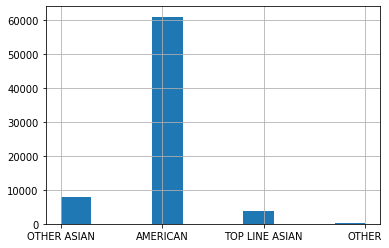

In [ ]:
df.Nationality.hist()

In [ ]:
df.loc[((df['Nationality']== 'OTHER ASIAN') | (df['Nationality']=='TOP LINE ASIAN')),'Nationality'] = 'ASIAN'

In [ ]:
df.Nationality.unique() #3 levels

array(['ASIAN', 'AMERICAN', 'OTHER', nan], dtype=object)

In [ ]:
df.Size.unique() #originaly 12 levels

array(['MEDIUM', 'LARGE TRUCK', 'COMPACT', 'LARGE', 'VAN', 'MEDIUM SUV',
       'LARGE SUV', 'SPECIALTY', 'SPORTS', 'CROSSOVER', 'SMALL SUV',
       'SMALL TRUCK', nan], dtype=object)

In [ ]:
df.loc[((df['Size']=='LARGE TRUCK') | (df['Size']=='SMALL TRUCK')),'Size'] = 'TRUCK'
df.loc[((df['Size']=='MEDIUM SUV') | (df['Size']=='LARGE SUV') | (df['Size']=='SMALL SUV') | (df['Size']=='CROSSOVER')),'Size'] = 'SUV' #crossover is a type of SUV
df.loc[((df['Size']=='SPECIALTY') | (df['Size']=='SPORTS')),'Size'] = 'OTHER'

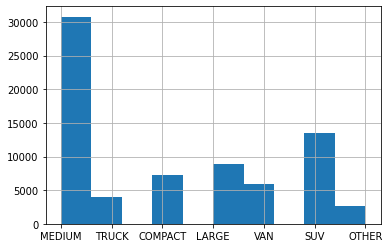

In [ ]:
df.Size.hist()

In [ ]:
df.Size.unique() #7 levels

array(['MEDIUM', 'TRUCK', 'COMPACT', 'LARGE', 'VAN', 'SUV', 'OTHER', nan],
      dtype=object)

In [ ]:
df.Size.value_counts()

MEDIUM     30785
SUV        13558
LARGE       8850
COMPACT     7205
VAN         5854
TRUCK       4034
OTHER       2692
Name: Size, dtype: int64

In [ ]:
df.VNST.unique() #37 levels

array(['FL', 'VA', 'IA', 'AR', 'MN', 'TN', 'PA', 'OH', 'AL', 'MI', 'TX',
       'IL', 'MA', 'AZ', 'GA', 'NC', 'MD', 'CA', 'UT', 'OR', 'SC', 'CO',
       'ID', 'NV', 'WV', 'MS', 'OK', 'NM', 'LA', 'IN', 'MO', 'WA', 'NH',
       'NJ', 'NY', 'NE', 'KY'], dtype=object)

Group states in 3 groups: West, East and Central

'FL',	Florida
'VA',	Virginia
'IA',	Iowa
'AR',	Arkansas
'MN',	Minnesota
'TN',	Tennessee
'PA',	Pennsylvania
'OH',	Ohio
'AL',	Alabama
'MI',	Michigan
'TX',	Texas
'IL',	Illinois
'MA',	Massachusetts
'AZ',	Arizona
'GA',	Georgia
'NC',	North Carolina
'MD',	Maryland
'CA',	California
'UT',	Utah
'OR',	Oregon
'SC',	South Carolina
'CO',	Colorado
'ID',	Idaho
'NV',	Nevada
'WV',	West Virginia
'MS',	Mississippi
'OK',	Oklahoma
'NM',	New Mexico
'LA',	Louisiana
'IN',	Indiana
'MO',	Missouri
'WA',	Washington
'NH',	New Hampshire
'NJ',	New Jersey
'NY',	New York
'NE',	Nebraska
'KY'	Kentucky

https://www.beresfordresearch.com/wp-content/uploads/2019/11/States-and-Regions-v2-1.jpg

https://upload.wikimedia.org/wikipedia/commons/7/78/Map_of_USA_with_state_names_es.svg

In [ ]:
df.loc[((df['VNST']=='WA') | (df['VNST']=='OR') | (df['VNST']=='CA') | (df['VNST']=='AZ') | (df['VNST']=='UT') | (df['VNST']=='NV') | (df['VNST']=='ID')),'VNST'] = 'WEST'
df.loc[((df['VNST']=='MN') | (df['VNST']=='CO') | (df['VNST']=='NM') | (df['VNST']=='TX') | (df['VNST']=='OK') | (df['VNST']=='NE') | (df['VNST']=='IA') | (df['VNST']=='IL') | (df['VNST']=='AR') | (df['VNST']=='LA') | (df['VNST']=='MS') | (df['VNST']=='MO')),'VNST'] = 'CENTRAL'
df.loc[((df['VNST']=='MI') | (df['VNST']=='IN') | (df['VNST']=='OH') | (df['VNST']=='KY') | (df['VNST']=='TN') | (df['VNST']=='AL') | (df['VNST']=='GA') | (df['VNST']=='FL') | (df['VNST']=='SC') | (df['VNST']=='NC') | (df['VNST']=='WV') | (df['VNST']=='VA') | (df['VNST']=='NY') | (df['VNST']=='NJ') | (df['VNST']=='WA') | (df['VNST']=='NH') | (df['VNST']=='PA') | (df['VNST']=='MA') | (df['VNST']=='MD')),'VNST'] = 'EAST'

In [ ]:
df.VNST.unique()

array(['EAST', 'CENTRAL', 'WEST'], dtype=object)

In [ ]:
df.VehBCost.describe() #numerical
#will check prices outliers later

count    72915.000000
mean      6729.249949
std       1764.962643
min          1.000000
25%       5430.000000
50%       6700.000000
75%       7900.000000
max      45469.000000
Name: VehBCost, dtype: float64

In [ ]:
df.IsOnlineSale.unique() #Binary

array([0, 1])

In [ ]:
df.IsOnlineSale.replace([0, 1], ["no","yes"], inplace=True)

In [ ]:
df.WarrantyCost.unique() #numerical

array([1113, 1053, 1389,  630, 1020,  594,  533,  825,  482, 1633, 1373,
        869, 1623,  686, 1455, 1243, 1923, 1703, 1551, 2003, 5613,  671,
        728,  754, 2452,  920, 1411, 1763, 1220, 1272, 2322, 1506,  971,
       1215, 2152,  569, 1155, 1003, 1283,  623,  723, 1086, 1503, 1103,
       1209, 1974, 1641,  462,  803,  983, 2063,  588, 1137,  986, 1413,
       1583, 1169,  853, 1134,  975, 1028, 1118, 1038, 1806, 1341, 1313,
       1469, 1125, 1320,  505, 1497, 1223,  834, 5392, 1930, 1153,  582,
       1774,  923,  693, 1800, 1689, 2074, 1398, 2274, 2712, 1485, 1500,
       1673, 2651,  930, 1740, 1543, 2218, 4032, 1275, 1630, 1508, 1054,
        837, 2351,  702,  620,  905, 1197, 1353, 2157,  894,  822,  764,
        805, 2282, 1450, 1251, 1046, 1769, 2495, 1065, 1290, 1216,  833,
       3115,  909, 1906, 6519, 1803,  782, 1666, 2040, 3676, 1515,  993,
       2198, 2506, 1023, 1606, 2022, 1481, 3667, 1628, 1711, 1857,  765,
       1918,  882, 3276, 3265, 3910, 1717, 2193, 20

In [ ]:
df.season.unique() #4 levels

array(['winter', 'spring', 'summer', 'fall'], dtype=object)

#Drop duplicates

In [ ]:
df.duplicated().sum()

5

In [ ]:
df.drop_duplicates(inplace=True)

# Outliers

In [ ]:
df.describe() #only numerical

,IsBadBuy,VehicleAge,VehOdo,VehBCost,WarrantyCost
count,72978.000000,72978.000000,72978.000000,72910.000000,72978.000000
mean,0.122955,4.176656,71500.206720,6729.228912,1276.591713
std,0.328388,1.712140,14578.649775,1764.956049,598.857621
min,0.000000,0.000000,4825.000000,1.000000,462.000000
25%,0.000000,3.000000,61837.250000,5430.000000,837.000000
50%,0.000000,4.000000,73361.500000,6700.000000,1155.000000
75%,0.000000,5.000000,82435.000000,7900.000000,1623.000000
max,1.000000,9.000000,115717.000000,45469.000000,7498.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f748dd996d0>,
      dtype=object)

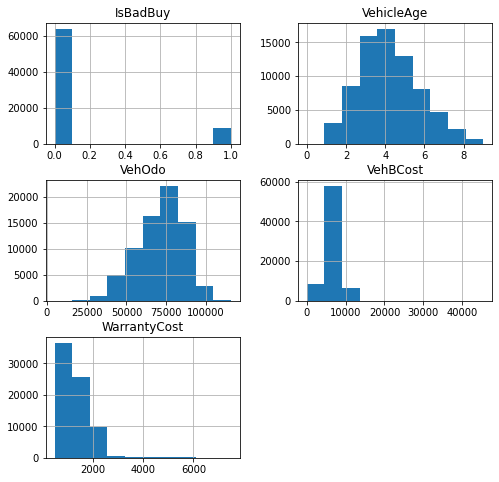

In [ ]:
df.hist(figsize=(8,8))

In [ ]:
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox

'VehOdo' Outliers

In [ ]:
Q1 = df['VehOdo'].quantile(0.25)
Q3 = df['VehOdo'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR


(61837.25, 82435.0, 20597.75)

In [ ]:
small_mild_outliers = df['VehOdo'] < (Q1 - 1.5 * IQR) 
big_mild_outliers = df['VehOdo'] > (Q3 + 1.5 * IQR)
small_severe_outliers = df['VehOdo'] < (Q1 - 3 * IQR) 
big_severe_outliers = df['VehOdo'] > (Q3 + 3 * IQR)

sum(small_mild_outliers), sum(big_mild_outliers), sum(small_severe_outliers), sum(big_severe_outliers)

(332, 4, 0, 0)

In [ ]:
#plots:
#fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
#df[~(small_mild_outliers | big_mild_outliers)].boxplot(column='VehOdo',ax=axes[0]);
#df[~(small_mild_outliers | big_mild_outliers)].hist(column='VehOdo', ax=axes[1]);

'VehBCost' Outliers

In [ ]:
df['VehBCost'].min()

1.0

In [ ]:
#set as na
df['VehBCost'][20442] = np.nan
df['VehBCost'][20442]

nan

In [ ]:
Q1 = df['VehBCost'].quantile(0.25)
Q3 = df['VehBCost'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(5430.0, 7900.0, 2470.0)

In [ ]:
small_mild_outliers = df['VehBCost'] < (Q1 - 1.5 * IQR) 
big_mild_outliers = df['VehBCost'] > (Q3 + 1.5 * IQR)
small_severe_outliers = df['VehBCost'] < (Q1 - 3 * IQR) 
big_severe_outliers = df['VehBCost'] > (Q3 + 3 * IQR)

sum(small_mild_outliers), sum(big_mild_outliers), sum(small_severe_outliers), sum(big_severe_outliers)

(4, 172, 0, 13)

In [ ]:
df.VehBCost.describe()

count    72909.000000
mean      6729.321195
std       1764.792245
min        225.000000
25%       5430.000000
50%       6700.000000
75%       7900.000000
max      45469.000000
Name: VehBCost, dtype: float64

In [ ]:
df[big_severe_outliers]
#most of them are BadBuy, automatic, alloy, asian, from west, not online sale and up to 3 years old. However, we consider that the value is expensive but possible. 
#Therefore we won't consider them as Outliers.

,IsBadBuy,Auction,VehicleAge,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,VNST,VehBCost,IsOnlineSale,WarrantyCost,season,age_cat
6031,1,MANHEIM,3,SEDAN,BLACK,AUTO,Alloy,26113,ASIAN,OTHER,WEST,28560.0,no,1121,fall,0to3_years
15308,1,MANHEIM,2,SPORT,GREY,AUTO,Alloy,13924,ASIAN,SUV,WEST,36485.0,no,1001,spring,0to3_years
22276,1,MANHEIM,1,SPORT,BLACK,AUTO,Alloy,17502,ASIAN,SUV,WEST,35900.0,no,702,fall,0to3_years
23450,1,MANHEIM,3,SPORT,MAROON,AUTO,Alloy,36544,ASIAN,SUV,WEST,20380.0,no,522,spring,0to3_years
37050,1,MANHEIM,3,SEDAN,GREY,AUTO,Alloy,61001,ASIAN,OTHER,CENTRAL,20100.0,no,1020,summer,0to3_years
38245,1,MANHEIM,1,CAB,MAROON,AUTO,Alloy,9446,AMERICAN,TRUCK,CENTRAL,32300.0,no,941,fall,0to3_years
38391,1,MANHEIM,2,SPORT,BLACK,AUTO,Alloy,32556,OTHER,SUV,CENTRAL,28180.0,no,1694,fall,0to3_years
48207,1,OTHER,2,SUV,BLACK,AUTO,NaN,20530,AMERICAN,SUV,WEST,45469.0,no,1001,summer,0to3_years
53072,1,OTHER,3,SEDAN,SILVER,AUTO,NaN,40023,ASIAN,OTHER,WEST,19000.0,no,764,fall,0to3_years
59223,0,MANHEIM,2,SEDAN,WHITE,AUTO,Alloy,36292,ASIAN,MEDIUM,WEST,16345.0,no,762,winter,0to3_years


In [ ]:
#Set as NA's
#df['VehBCost'][big_severe_outliers] = np.nan
#Drop them
#df.drop([big_severe_outliers], axis=0, inplace=True) #no funciona. checkear

#CHECK WHAT TO DO WITH THEM!!!!!!!!!

'WarrantyCost' Outliers

In [ ]:
df.WarrantyCost.describe()

count    72978.000000
mean      1276.591713
std        598.857621
min        462.000000
25%        837.000000
50%       1155.000000
75%       1623.000000
max       7498.000000
Name: WarrantyCost, dtype: float64

In [ ]:
Q1 = df['WarrantyCost'].quantile(0.25)
Q3 = df['WarrantyCost'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR


(837.0, 1623.0, 786.0)

In [ ]:
small_mild_outliers = df['WarrantyCost'] < (Q1 - 1.5 * IQR) 
big_mild_outliers = df['WarrantyCost'] > (Q3 + 1.5 * IQR)
small_severe_outliers = df['WarrantyCost'] < (Q1 - 3 * IQR) 
big_severe_outliers = df['WarrantyCost'] > (Q3 + 3 * IQR)

sum(small_mild_outliers), sum(big_mild_outliers), sum(small_severe_outliers), sum(big_severe_outliers)

(0, 838, 0, 466)

In [ ]:
df[big_severe_outliers]
#The maximun value of WarrantyCost is 7498. We consider that it is very expensive but we are not sure that they are outliers. Therefore we wont treat them.

,IsBadBuy,Auction,VehicleAge,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,VNST,VehBCost,IsOnlineSale,WarrantyCost,season,age_cat
22,0,ADESA,5,PASSENGER,SILVER,AUTO,Covers,98130,AMERICAN,VAN,EAST,4100.0,no,5613,winter,3to6_years
147,0,ADESA,9,MINIVAN,GOLD,AUTO,Alloy,83238,AMERICAN,VAN,EAST,5100.0,no,5392,spring,6to9_years
232,0,ADESA,5,SUV,WHITE,AUTO,Covers,85262,AMERICAN,SUV,EAST,7200.0,no,4032,spring,3to6_years
432,0,ADESA,5,PASSENGER,BEIGE,AUTO,Alloy,81835,AMERICAN,VAN,EAST,5245.0,no,6519,summer,3to6_years
792,0,ADESA,5,PASSENGER,BLUE,AUTO,Alloy,84788,AMERICAN,VAN,EAST,5540.0,no,5092,fall,3to6_years
977,0,ADESA,6,MINIVAN,SILVER,AUTO,Alloy,85139,AMERICAN,VAN,CENTRAL,4715.0,no,5092,winter,3to6_years
1109,0,ADESA,6,PASSENGER,GREY,AUTO,Alloy,109133,AMERICAN,VAN,CENTRAL,4365.0,no,6192,fall,3to6_years
1123,1,ADESA,8,MINIVAN,BLUE,AUTO,Alloy,107151,AMERICAN,VAN,CENTRAL,3310.0,no,6492,winter,6to9_years
1240,1,ADESA,4,MINIVAN,WHITE,AUTO,Alloy,80766,AMERICAN,VAN,EAST,4810.0,no,5092,spring,3to6_years
1378,0,ADESA,6,PASSENGER,GREY,AUTO,Alloy,81150,AMERICAN,VAN,EAST,5350.0,no,5092,fall,3to6_years


In [ ]:
#df['WarrantyCost'][big_severe_outliers] = np.nan

In [ ]:
df.isnull().sum()

IsBadBuy           0
Auction            0
VehicleAge         0
SubModel           0
Color            102
Transmission       9
WheelType       3171
VehOdo             0
Nationality        5
Size               5
VNST               0
VehBCost          69
IsOnlineSale       0
WarrantyCost       0
season             0
age_cat            0
dtype: int64

#Imputation of Missing Values

In [ ]:
subset_of_df = df.drop(columns=['VehBCost', 'Size', 'Nationality', 'WheelType', 'Transmission', 'Color'])
subset_of_df.shape

rows_not_missing = df.VehBCost.notna()

df_without_missings = subset_of_df[rows_not_missing]
df_without_missings.shape

df_where_VehBCost_has_missing_values = subset_of_df[df.VehBCost.isna()]
df_where_VehBCost_has_missing_values.shape

(69, 10)

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 8.6 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=68f7b3e1a8cf607a6a25ea30a32c7213dcce21a1431c7b830c07590c68a01ee7
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=5893b70504708fd84dad98d11146a8723528fedbe1637f3319c54d29d0d0973d
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:
import missingno as msno
from fancyimpute import IterativeImputer
import matplotlib.pyplot as plt

X: numerical df

In [ ]:
X=df[['VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost']]
X

Output hidden; open in https://colab.research.google.com to view.

# **MICE Imputation**

In [ ]:
mice_imputer=IterativeImputer()
df_imputed=mice_imputer.fit_transform(X)

In [ ]:
X_imputed=pd.DataFrame(df_imputed, columns=X.columns)

In [ ]:
X_imputed.isnull().sum()

VehicleAge      0
VehOdo          0
VehBCost        0
WarrantyCost    0
dtype: int64

In [ ]:
df.isnull().sum()

IsBadBuy           0
Auction            0
VehicleAge         0
SubModel           0
Color            102
Transmission       9
WheelType       3171
VehOdo             0
Nationality        5
Size               5
VNST               0
VehBCost          69
IsOnlineSale       0
WarrantyCost       0
season             0
age_cat            0
dtype: int64

In [ ]:
df['VehBCost']=X_imputed['VehBCost']

In [ ]:
df.isnull().sum()

IsBadBuy           0
Auction            0
VehicleAge         0
SubModel           0
Color            102
Transmission       9
WheelType       3171
VehOdo             0
Nationality        5
Size               5
VNST               0
VehBCost           5
IsOnlineSale       0
WarrantyCost       0
season             0
age_cat            0
dtype: int64

In [ ]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [ ]:
df.isnull().sum()

IsBadBuy        0
Auction         0
VehicleAge      0
SubModel        0
Color           0
Transmission    0
WheelType       0
VehOdo          0
Nationality     0
Size            0
VNST            0
VehBCost        0
IsOnlineSale    0
WarrantyCost    0
season          0
age_cat         0
dtype: int64

#Numerical variables to categorical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69732 entries, 0 to 72977
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IsBadBuy      69732 non-null  int64  
 1   Auction       69732 non-null  object 
 2   VehicleAge    69732 non-null  int64  
 3   SubModel      69732 non-null  object 
 4   Color         69732 non-null  object 
 5   Transmission  69732 non-null  object 
 6   WheelType     69732 non-null  object 
 7   VehOdo        69732 non-null  int64  
 8   Nationality   69732 non-null  object 
 9   Size          69732 non-null  object 
 10  VNST          69732 non-null  object 
 11  VehBCost      69732 non-null  float64
 12  IsOnlineSale  69732 non-null  object 
 13  WarrantyCost  69732 non-null  int64  
 14  season        69732 non-null  object 
 15  age_cat       69732 non-null  object 
dtypes: float64(1), int64(4), object(11)
memory usage: 9.0+ MB


In [ ]:
df.VehOdo.describe()

count     69732.000000
mean      71458.009135
std       14574.226481
min        5368.000000
25%       61815.000000
50%       73322.000000
75%       82383.250000
max      115717.000000
Name: VehOdo, dtype: float64

In [ ]:
#We took quartiles to set the threshold split

def get_group_VehOdo(x):
    if x <= 61815:
        return '0-61815'
    if x > 61815 and x <= 73322:
        return '61815-73322'
    if x > 73322 and x <= 82383:
        return '73322-82383'
    if x > 82383:
        return '>82383'

df['VehOdo_cat'] = df.VehOdo.apply(lambda x : get_group_VehOdo(x))

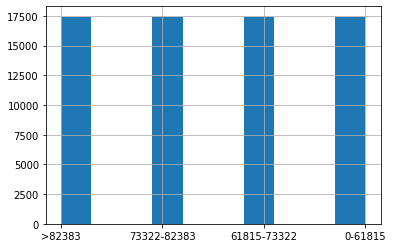

In [ ]:
df.VehOdo_cat.hist()

In [ ]:
df.VehBCost.describe()

count    69732.000000
mean      6734.146182
std       1762.821878
min        225.000000
25%       5440.000000
50%       6710.000000
75%       7900.000000
max      45469.000000
Name: VehBCost, dtype: float64

In [ ]:
def get_group_VehBCost(x):
    if x <= 5440:
        return '0-5440'
    if x > 5440 and x <= 6710:
        return '5440-6710'
    if x > 6710 and x <= 7900:
        return '6710-7900'
    if x > 7900:
        return '>7900'

df['VehBCost_cat'] = df.VehBCost.apply(lambda x : get_group_VehBCost(x))

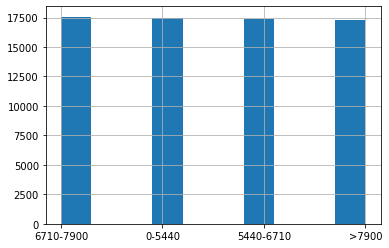

In [ ]:
df.VehBCost_cat.hist()

In [ ]:
df.WarrantyCost.describe()

count    69732.000000
mean      1275.580236
std        597.204524
min        462.000000
25%        837.000000
50%       1155.000000
75%       1623.000000
max       7498.000000
Name: WarrantyCost, dtype: float64

In [ ]:
def get_group_WarrantyCost(x):
    if x <= 837:
        return '0-837'
    if x > 837 and x <= 1155:
        return '837-1155'
    if x > 1155 and x <= 1623:
        return '1155-1623'
    if x > 1623:
        return '>1623'

df['WarrantyCost_cat'] = df.WarrantyCost.apply(lambda x : get_group_WarrantyCost(x))

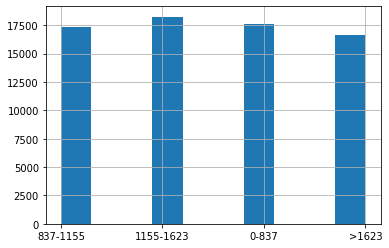

In [ ]:
df.WarrantyCost_cat.hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69732 entries, 0 to 72977
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IsBadBuy          69732 non-null  int64  
 1   Auction           69732 non-null  object 
 2   VehicleAge        69732 non-null  int64  
 3   SubModel          69732 non-null  object 
 4   Color             69732 non-null  object 
 5   Transmission      69732 non-null  object 
 6   WheelType         69732 non-null  object 
 7   VehOdo            69732 non-null  int64  
 8   Nationality       69732 non-null  object 
 9   Size              69732 non-null  object 
 10  VNST              69732 non-null  object 
 11  VehBCost          69732 non-null  float64
 12  IsOnlineSale      69732 non-null  object 
 13  WarrantyCost      69732 non-null  int64  
 14  season            69732 non-null  object 
 15  age_cat           69732 non-null  object 
 16  VehOdo_cat        69732 non-null  object

In [ ]:
df.to_csv('/content/drive/MyDrive/ML/Machine Learning Project. GALINDO - PAGLIA/KickBeforeOHE.csv', sep=';', index=False)

# Profile Report

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [ ]:
!pip install pandas-profiling

In [ ]:
import sys
import pandas_profiling
from pandas_profiling import ProfileReport

In [ ]:
#for this report it is necesary to follow the instructions given in the following link
#https://stackoverflow.com/questions/68704002/importerror-cannot-import-name-abcindexclass-from-pandas-core-dtypes-generic
profile_df = ProfileReport(df)
profile_df.to_file('/content/drive/MyDrive/ML/Profile_Kick.html')